<a href="https://colab.research.google.com/github/victor-maciel/tabd-unifacisa/blob/master/kmeans(naosupervisionado)2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install seaborn==0.9.0

In [8]:
import pandas as pd

uri_filmes = 'https://raw.githubusercontent.com/DWA-GIT/TESI-UNIFACISA/master/movies_novo.csv'
filmes = pd.read_csv(uri_filmes)
filmes.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
filmes.shape

(9742, 3)

In [13]:
filmes.columns =['filme_id', 'titulo', 'generos']
filmes.head(5)


,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head(5)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
dados_dos_filmes.shape

(9742, 23)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

generos_escalados = scaler.fit_transform(generos)

generos_escalados



array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [28]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
print(f'Grupos {modelo.labels_}')
modelo.labels_.shape

Grupos [11  0 18 ...  1 16  3]


(9742,)

In [32]:
print(modelo.cluster_centers_)

[[-5.91799474e-02  4.35094232e-01  1.23364536e+00 -2.58679155e-01
   7.47242008e-01  3.28877946e-02 -2.95773535e-01 -2.05014272e-01
  -3.94878397e-01  3.39201660e+00 -9.49256298e-02 -1.96124743e-01
  -1.28397078e-01 -1.88418950e-01 -1.83921012e-01 -2.60644299e-01
   2.25399552e-01 -3.07964494e-01 -2.02019716e-01 -1.32065337e-01]
 [-5.91799474e-02 -3.60666518e-01 -2.93761432e-01 -2.58679155e-01
  -2.70451223e-01 -7.92126305e-01 -3.74631584e-01 -2.17489438e-01
   1.11080660e+00 -2.94809878e-01 -9.49256298e-02 -3.34055205e-01
  -1.28397078e-01 -1.88418950e-01 -2.49986367e-01 -4.42633460e-01
  -3.34434762e-01 -1.70632080e-01 -2.02019716e-01 -1.32065337e-01]
 [-5.91799474e-02  9.19046491e-01  7.46879942e-01 -2.58679155e-01
  -2.52893809e-01 -4.10307048e-01 -3.00553868e-01 -2.17489438e-01
  -4.73120350e-01 -2.78496486e-01 -9.49256298e-02 -3.11969547e-01
  -1.28397078e-01 -1.88418950e-01 -2.31180152e-01 -3.52970659e-01
   2.99011978e+00  3.24934402e-01 -2.02019716e-01 -1.32065337e-01]
 [-5.91

In [35]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.435094,1.233645,-0.258679,0.747242,0.032888,-0.295774,-0.205014,-0.394878,3.392017,-0.094926,-0.196125,-0.128397,-0.188419,-0.183921,-0.260644,0.225400,-0.307964,-0.202020,-0.132065
1,-0.059180,-0.360667,-0.293761,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,1.110807,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.170632,-0.202020,-0.132065
2,-0.059180,0.919046,0.746880,-0.258679,-0.252894,-0.410307,-0.300554,-0.217489,-0.473120,-0.278496,-0.094926,-0.311970,-0.128397,-0.188419,-0.231180,-0.352971,2.990120,0.324934,-0.202020,-0.132065
3,-0.059180,-0.311278,-0.294232,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.297447,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.449091,-0.202020,-0.132065
4,-0.059180,-0.333405,-0.317512,-0.163864,-0.270451,-0.744895,1.444723,-0.217489,0.255531,-0.252433,10.534563,-0.257559,-0.128397,-0.188419,0.922484,-0.194188,-0.219795,0.699553,-0.202020,-0.043513
5,-0.059180,0.128485,0.249380,-0.183231,-0.125281,-0.303544,-0.189027,-0.188127,-0.189021,-0.159926,-0.094926,-0.192025,-0.128397,0.146687,-0.172239,-0.113141,-0.192533,-0.244737,0.112129,7.572010
6,-0.059180,-0.462136,-0.364480,-0.238850,-0.260913,-0.604451,-0.338046,4.597924,-0.808396,-0.285947,-0.094926,-0.318057,-0.128397,-0.188419,-0.229553,-0.429644,-0.334435,-0.479111,-0.078173,-0.132065
7,-0.059180,-0.059981,-0.359758,-0.258679,-0.270451,-0.599324,-0.124691,-0.217489,-0.511011,-0.013703,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.387170,0.357775,2.035586,-0.202020,-0.132065
8,-0.059180,-0.156647,-0.268282,-0.226075,-0.207716,-0.516021,0.491623,-0.217489,0.145024,-0.032506,-0.094926,0.520855,-0.128397,-0.188419,4.000218,-0.143616,0.046641,1.176659,-0.202020,-0.132065
9,-0.059180,0.404605,0.035718,-0.211943,-0.259210,-0.466192,-0.297025,-0.190207,0.751893,-0.253033,-0.094926,-0.305776,-0.128397,-0.188419,-0.213866,-0.052283,-0.240255,-0.197773,4.950012,-0.132065


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa14323e908>,
      dtype=object)

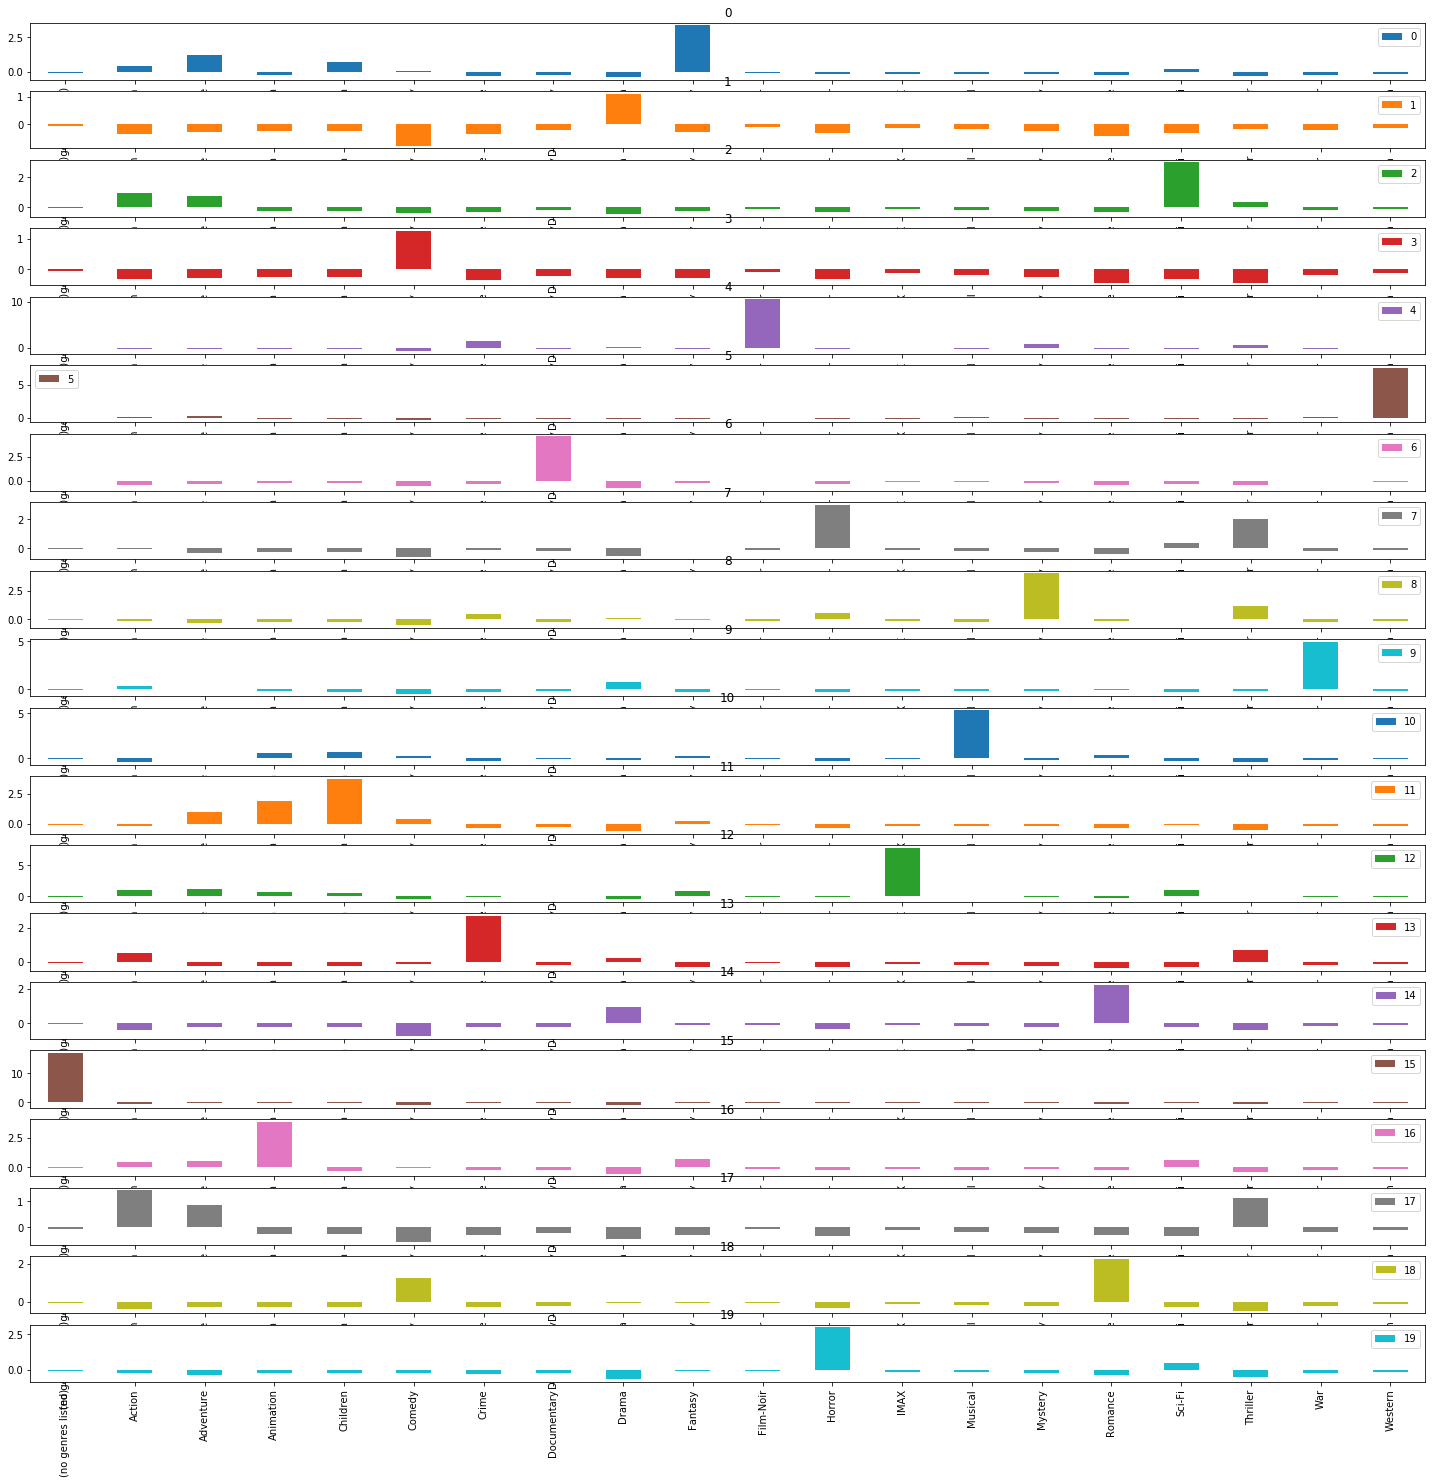

In [39]:
grupos.transpose().plot.bar(subplots=True, figsize=(25,25), sharex = False)

In [41]:
from sklearn.manifold import TSNE

tsne = TSNE()

view = tsne.fit_transform(generos_escalados)
view

array([[-29.190147 ,  51.80302  ],
       [-54.819294 ,  31.136276 ],
       [-14.978537 , -12.347517 ],
       ...,
       [ 13.265878 ,  -0.4958527],
       [ 36.179302 , -45.706802 ],
       [-22.190502 ,  21.871035 ]], dtype=float32)

In [48]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13,13)})

sns.scatterplot(x=view[:,0], y=view[:,1], hue = modelo.labels_, palette=sns.color_palette(palette="set1", n_colors=20))

ValueError: ignored

In [0]:
def KMeans(numero_clusters, generos):
  modelo = Kmeans(numero_clusters=numero_clusters)
  modelo.fit(generos)
  return [numero_clusters, modelos.inertia_]

In [54]:
KMeans(20, generos_escalados)

NameError: ignored